<a href="https://colab.research.google.com/github/1k3nj1/Projeto-YOLO/blob/main/desafio_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar dependências
!pip install ultralytics kaggle -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"k3nj1hhh","key":"99ae77c0b0ef744ec56789a08cd0750d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d vencerlanz09/taco-dataset-yolo-format

!unzip taco-dataset-yolo-format.zip -d /content/taco

!ls /content/taco


Streaming output truncated to the last 5000 lines.
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.6c0cebc42950c9485c1fec799f79d30e.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.971eab1d0640140f0b61357f49894103.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.9fe266cb29fc471e50a3113363781d45.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.a0ffded1b4df9285e860a02c3451e0b3.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.afd2c85571e873f9f67b964f56ff44c2.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.f8c66618a413ef0343b5170d12a09784.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.fbc18cc7703a8884f77cb2797ff8fda5.txt  
  inflating: /content/taco/train/labels/000055_JPG_jpg.rf.ff45590651469ae1234a48aecbb88111.txt  
  inflating: /content/taco/train/labels/000055_jpg.rf.0351831ddeffd9976bd5c2cf6412653f.txt  
  inflating: /content/taco/train/labels/000055_jpg.rf.0474fd3546be716dad7c02c2e1

In [5]:
import yaml

data = {
    'path': '/content/taco',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 1,               # número de classes (apenas "taco")
    'names': ['taco']
}

with open('/content/taco.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print(open('/content/taco.yaml').read())



names:
- taco
nc: 1
path: /content/taco
train: train/images
val: valid/images



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/taco.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1393.1±482.8 MB/s, size: 51.7 KB)


train: Scanning /content/taco/train/labels... 4200 images, 0 backgrounds, 4161 corrupt: 100%|██████████| 4200/4200 [00:01<00:00, 2860.82it/s]

train: /content/taco/train/images/000000_JPG_jpg.rf.0c1d3ad769060ea39a27c74edac0375f.jpg: ignoring corrupt image/label: Label class 17 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/taco/train/images/000000_JPG_jpg.rf.15defe8ba5f11efab465e4514584cf35.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/taco/train/images/000000_JPG_jpg.rf.1fe2fd57e7442d2d151e149a00fa7cf7.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/taco/train/images/000000_JPG_jpg.rf.2a350b240c67942b0c4a9e076fec45c4.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/taco/train/images/000000_JPG_jpg.rf.2d5c293976d772203617d916475ad921.jpg: ignoring corrupt image/label: Label class 17 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/taco/tr

train: New cache created: /content/taco/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 807.4±389.7 MB/s, size: 35.4 KB)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/taco/valid/labels... 1704 images, 0 backgrounds, 1683 corrupt: 100%|██████████| 1704/1704 [00:00<00:00, 3000.19it/s]

val: /content/taco/valid/images/000000_JPG_jpg.rf.3edf656d858861970ef06ee35c0122d5.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_JPG_jpg.rf.7502211fb8242d7964e1ca87a3d02872.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_JPG_jpg.rf.fe8c5b04344730f0e888cb1d99ee4b3c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jpg.rf.0e27c88666f15d047eaa42f9d635f5a8.jpg: ignoring corrupt image/label: Label class 12 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jpg.rf.11de0df2fb127d8a1ef041a2a68c5f96.jpg: ignoring corrupt image/label: Label class 17 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jp


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.215      3.477       1.26         13        640: 100%|██████████| 3/3 [00:37<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.66s/it]

                   all         21         26    0.00317      0.769     0.0115    0.00844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.078      3.393      1.048         19        640: 100%|██████████| 3/3 [00:34<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.46s/it]

                   all         21         26    0.00365      0.885     0.0775     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.165      2.835      1.164         19        640: 100%|██████████| 3/3 [00:31<00:00, 10.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.41s/it]

                   all         21         26    0.00349      0.846      0.181      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.018      2.013      1.028         35        640: 100%|██████████| 3/3 [00:30<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.94s/it]

                   all         21         26    0.00349      0.846       0.25      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      0.878      1.645     0.9754         14        640: 100%|██████████| 3/3 [00:30<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]

                   all         21         26    0.00365      0.885      0.276      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G       1.07      1.692      1.092         15        640: 100%|██████████| 3/3 [00:30<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]

                   all         21         26    0.00381      0.923      0.301      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.9011      1.428     0.9901         21        640: 100%|██████████| 3/3 [00:31<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]

                   all         21         26    0.00365      0.885      0.377      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G     0.9389       1.69      1.019         13        640: 100%|██████████| 3/3 [00:31<00:00, 10.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]

                   all         21         26    0.00365      0.885      0.368      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.9549      1.484      1.055         22        640: 100%|██████████| 3/3 [00:31<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]

                   all         21         26    0.00365      0.885      0.312       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.9857      1.378      1.098         25        640: 100%|██████████| 3/3 [00:32<00:00, 10.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         21         26    0.00397      0.962      0.306      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.8325      1.226     0.9441         19        640: 100%|██████████| 3/3 [00:31<00:00, 10.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]

                   all         21         26    0.00381      0.923      0.268      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.7447      1.298     0.9355         13        640: 100%|██████████| 3/3 [00:31<00:00, 10.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]

                   all         21         26    0.00381      0.923      0.286      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G     0.8747      1.321      1.063         15        640: 100%|██████████| 3/3 [00:31<00:00, 10.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all         21         26    0.00365      0.885      0.303      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.076      1.366      1.093         20        640: 100%|██████████| 3/3 [00:30<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]

                   all         21         26    0.00365      0.885      0.272      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.9878      1.397     0.9807         24        640: 100%|██████████| 3/3 [00:30<00:00, 10.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

                   all         21         26    0.00365      0.885        0.2      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.9737      1.597      1.201          9        640: 100%|██████████| 3/3 [00:30<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.69s/it]

                   all         21         26    0.00365      0.885      0.179      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.9061      1.232     0.9723         29        640: 100%|██████████| 3/3 [00:30<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.68s/it]

                   all         21         26    0.00365      0.885      0.189       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      0.892      1.311      1.066         11        640: 100%|██████████| 3/3 [00:30<00:00, 10.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.70s/it]

                   all         21         26     0.0066      0.808      0.274      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.9166      1.363      1.065         12        640: 100%|██████████| 3/3 [00:30<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.71s/it]

                   all         21         26      0.478      0.493      0.395      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.021      1.256      1.099         15        640: 100%|██████████| 3/3 [00:31<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.75s/it]

                   all         21         26          1      0.218      0.609      0.459


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      21/30         0G     0.7687      1.246     0.9103          9        640: 100%|██████████| 3/3 [00:30<00:00, 10.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.89s/it]

                   all         21         26          1      0.342      0.689      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.8345      1.361     0.9318          7        640: 100%|██████████| 3/3 [00:30<00:00, 10.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.48s/it]

                   all         21         26          1      0.581      0.753      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.8101      1.315     0.9192         12        640: 100%|██████████| 3/3 [00:30<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.97s/it]

                   all         21         26          1      0.583      0.741      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      0.756      1.283     0.9429         18        640: 100%|██████████| 3/3 [00:30<00:00, 10.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         21         26          1      0.549      0.782      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      0.712       1.25     0.9025         13        640: 100%|██████████| 3/3 [00:31<00:00, 10.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.89s/it]

                   all         21         26          1      0.464      0.822       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.7327      1.187     0.9002         17        640: 100%|██████████| 3/3 [00:31<00:00, 10.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]

                   all         21         26      0.938      0.586      0.827      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.6947      1.151     0.8546         12        640: 100%|██████████| 3/3 [00:31<00:00, 10.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]

                   all         21         26      0.896      0.664      0.832      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.6877      1.324     0.8498          7        640: 100%|██████████| 3/3 [00:31<00:00, 10.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.84s/it]

                   all         21         26      0.895      0.654      0.843      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.743      1.091      0.909         12        640: 100%|██████████| 3/3 [00:31<00:00, 10.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]

                   all         21         26      0.895      0.654      0.843      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.6968      1.124     0.8994         15        640: 100%|██████████| 3/3 [00:31<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]

                   all         21         26      0.897      0.654      0.858       0.67



30 epochs completed in 0.316 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.74s/it]


                   all         21         26      0.897      0.654      0.857      0.669
Speed: 2.4ms preprocess, 243.6ms inference, 0.0ms loss, 20.0ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 678.8±372.9 MB/s, size: 27.4 KB)


val: Scanning /content/taco/valid/labels.cache... 1704 images, 0 backgrounds, 1683 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]

val: /content/taco/valid/images/000000_JPG_jpg.rf.3edf656d858861970ef06ee35c0122d5.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_JPG_jpg.rf.7502211fb8242d7964e1ca87a3d02872.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_JPG_jpg.rf.fe8c5b04344730f0e888cb1d99ee4b3c.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jpg.rf.0e27c88666f15d047eaa42f9d635f5a8.jpg: ignoring corrupt image/label: Label class 12 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jpg.rf.11de0df2fb127d8a1ef041a2a68c5f96.jpg: ignoring corrupt image/label: Label class 17 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/taco/valid/images/000000_jp


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.71s/it]


                   all         21         26      0.897      0.654      0.857      0.669
Speed: 2.1ms preprocess, 231.2ms inference, 0.0ms loss, 15.5ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ea3c8091970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.

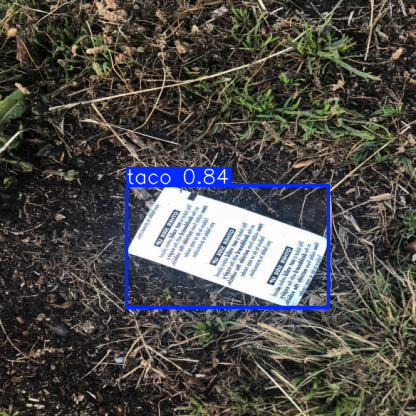

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 4.4s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (5.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val 

'runs/detect/train/weights/best.onnx'

In [6]:
from ultralytics import YOLO

# carregar modelo pré-treinado
model = YOLO('yolov8n.pt')

# treinar
model.train(
    data='/content/taco.yaml',
    epochs=30,     # pode aumentar
    imgsz=640,
    batch=16
)

# validar
metrics = model.val()
print(metrics)

# testar em uma imagem de validação
from glob import glob
img = glob('/content/taco/valid/images/*.jpg')[0]
results = model.predict(source=img, conf=0.25)
results[0].show()

# exportar modelo
model.export(format='onnx')
